## Complicated shaded-relief plot with overlaid data
Created and tested by A. Newman on 8/23/2022
* updated: A. Newman 11/8/2023

A bit of caution!  Once you learn and are capable of doing these plots, there is a tendancy to overuse it.  Remember, only show on a plot what is necessary to convey ideas.  Other information is noise that detracts from the work.

gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.6 at 30x30 arc minutes reduced by Gaussian Cartesian filtering (157.3 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [383K]: earth_relief_30m_g.grd


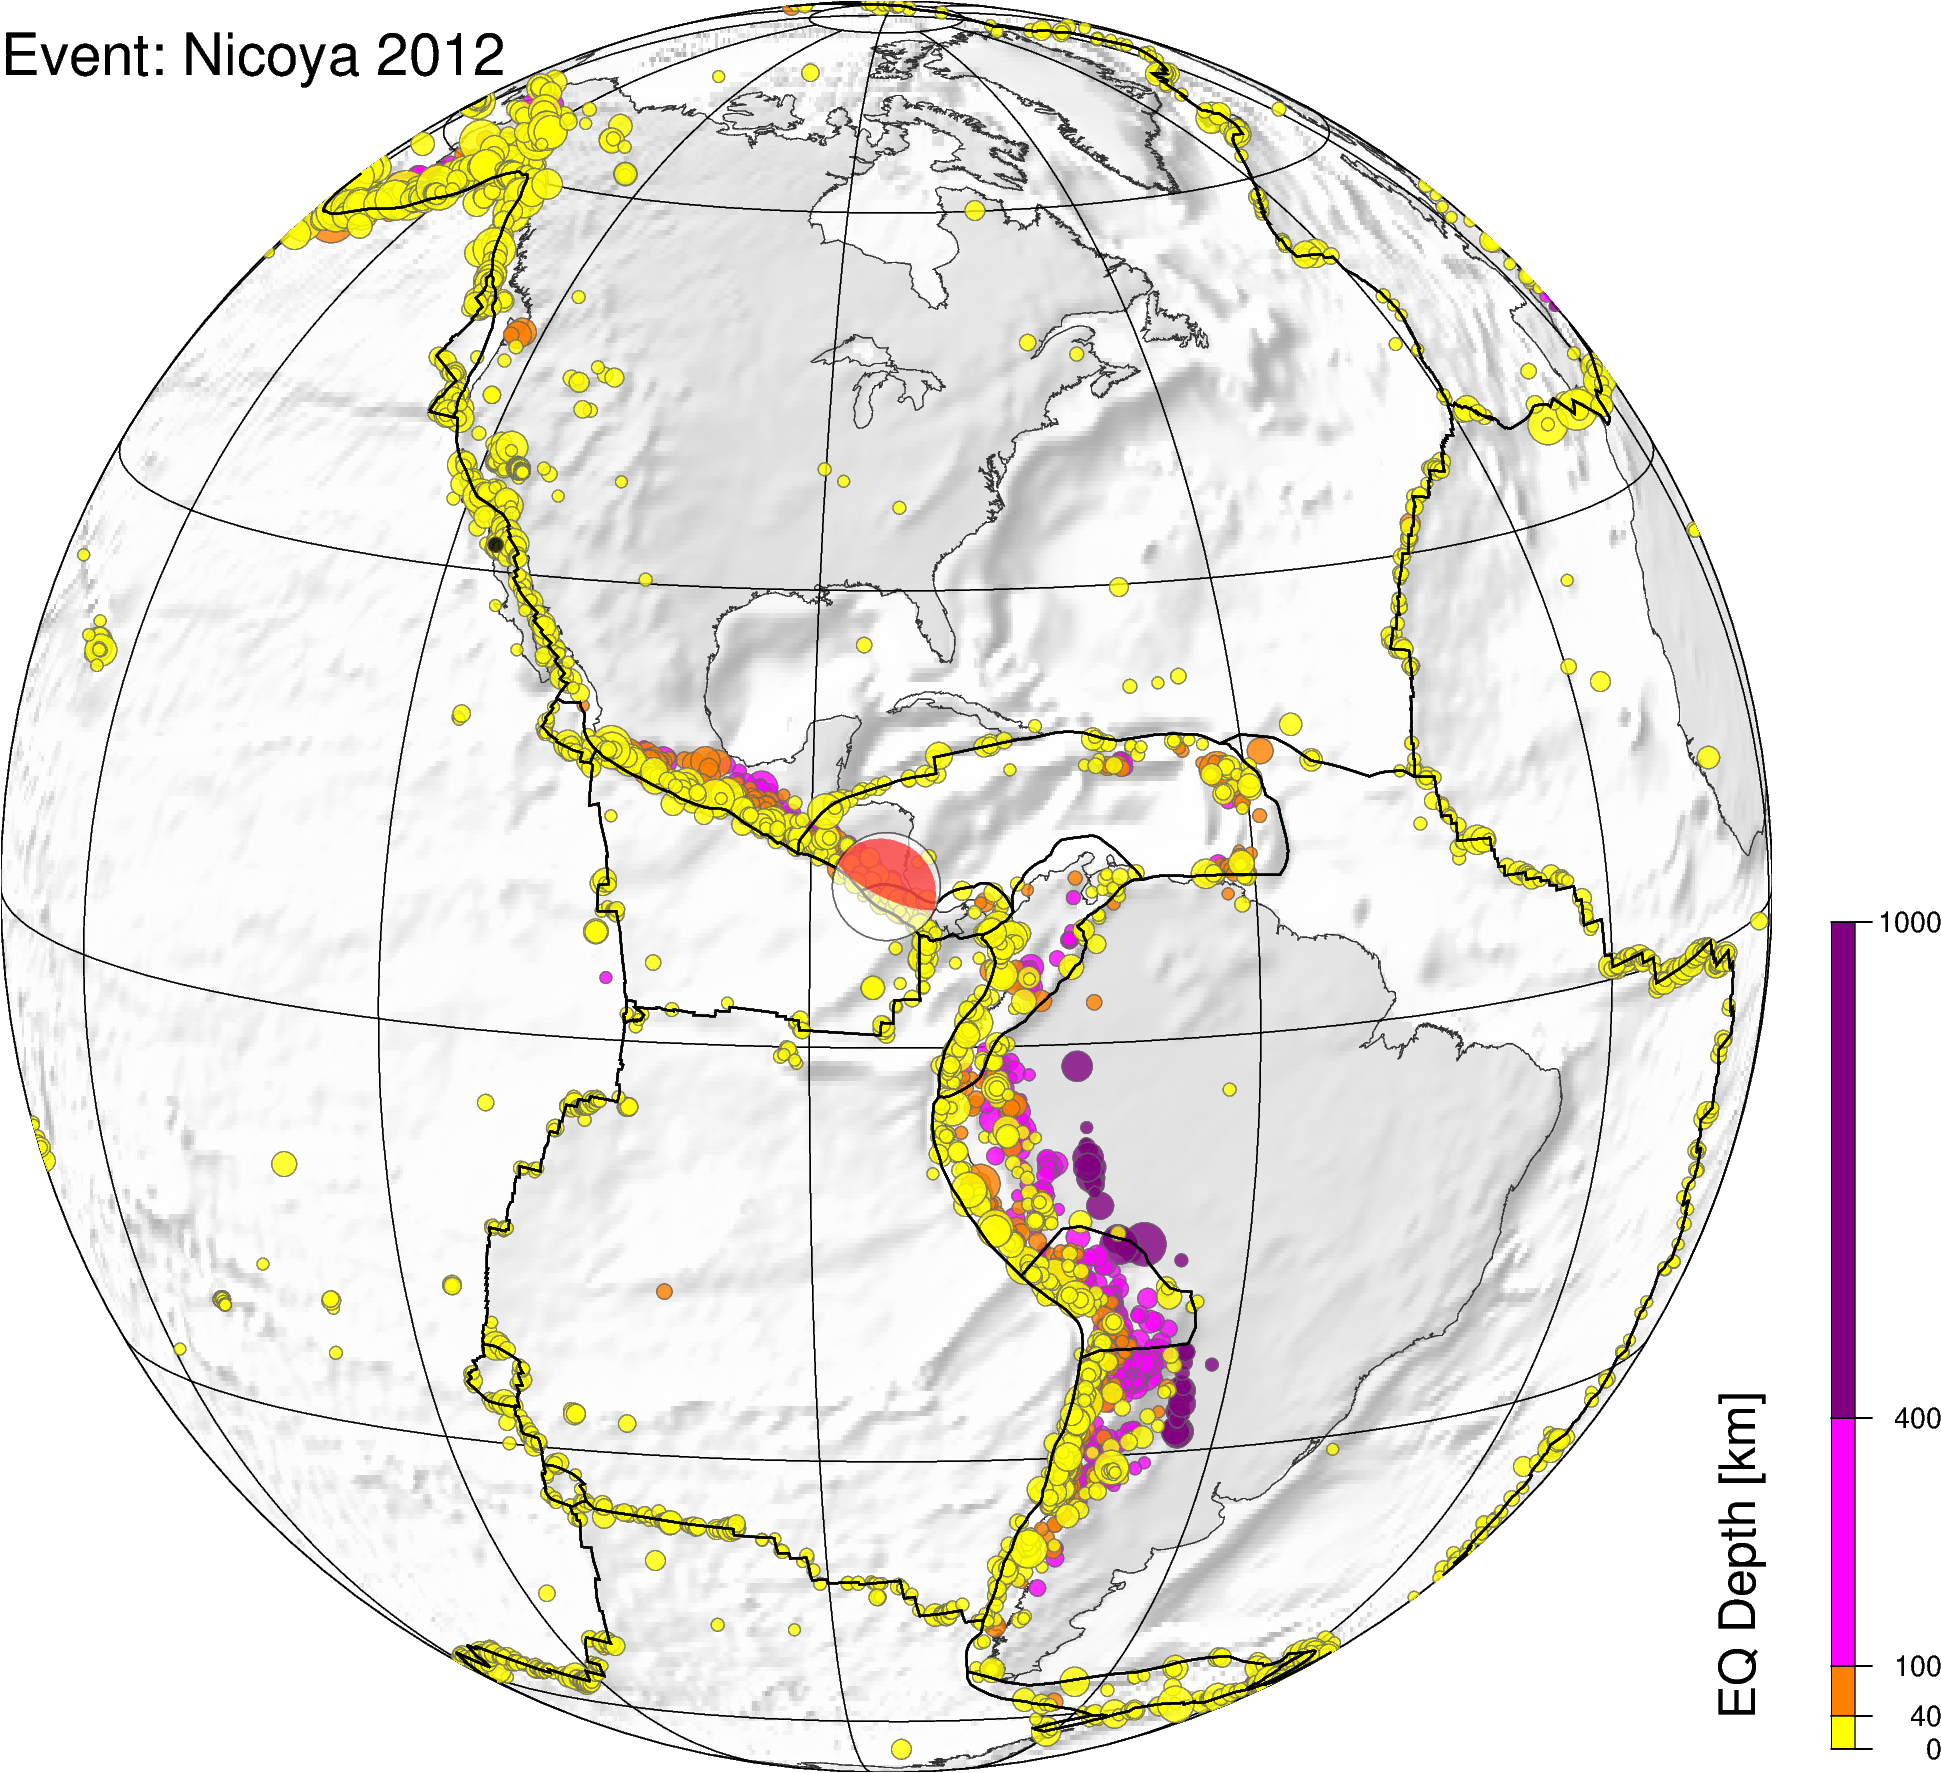

In [1]:
# plot a specific earthquake on a global map with
#    plate boundaries, and prior earthquakes (depth-colored)
import pygmt
import os

fig1=pygmt.Figure()
eloc=[-85,10.5]
emech=dict(strike=308, dip=17, rake=102, magnitude=7.62)
libdir=os.path.join(os.getcwd(),'mapdata')
eventname='Nicoya 2012'

# make basemap    
scale=15
proj="G"+str(eloc[0])+"/"+str(eloc[1])+"/"+str(scale)+"c" # define projection up front
grid = pygmt.datasets.load_earth_relief(resolution="30m")
#    dgrid = gmt.grdgradient(grid=grid, radiance=[45, 80])
mapcpt=os.path.join(libdir,'map_gray.cpt') # use my favorite light shade
with pygmt.config(MAP_FRAME_PEN="0.3p,black"):
    fig1.grdimage(grid=grid, cmap=mapcpt, shading=True, 
                  projection=proj,transparency=50)
    fig1.coast(shorelines="0.2p,50", area_thresh=100000, 
               frame="afg30", projection=proj)

# background earthquakes
eqcpt=os.path.join(libdir,'eq_color.cpt') # my color scale for EQs
eqs=os.path.join(libdir,'EQM4plus.data.sorted')
fig1.plot(data=eqs, style='c', cmap=eqcpt, 
          pen='0.2,100', transparency=20)
fig1.colorbar(cmap=eqcpt,position="x15.5/0.2+w7c/0.2c+v")

# Plates
plates=os.path.join(libdir,'PB2002_plates.txt') # global plate DB
fig1.plot(data=plates, pen='0.5,0', transparency=10)

# plot event focal mechanism location in center
fig1.meca(emech, scale="0.6c", 
          longitude=eloc[0], latitude=eloc[1],depth=0,
          transparency=40, compressionfill='red',
         )


# add text (creating a new projection normalized from 0-1)
with pygmt.config(MAP_FRAME_PEN="0,white"):
    proj2="X"+str(scale)+"c"
    fig1.basemap(region=[0,1,0,1], projection=proj2,frame='wesn')
    fig1.text(text='EQ Depth [km]',x=0.99,y=0.03, 
              justify="LB", font="12p,Helvetica,black", angle=90)
    fig1.text(text='Event: '+ eventname,x=0,y=0.97, 
              justify="LM", font="14p,Helvetica,black", angle=0)
 
fig1.show()
fig1.savefig('StationMap_'+eventname+'.png',
             anti_alias=True, dpi=150,show=True)
